In [262]:
# Run the pre-processing and the auxiliary functions

# %run 'pre-processing.ipynb'
%run 'auxiliary.ipynb'
from ipynb.fs.full.auxiliary import *

In [357]:
import pandas as pd

PROCESSED_DATA_FOLDER = '../processed_data/'

PROCESSED_CHARACTER = PROCESSED_DATA_FOLDER + 'character_metadata.csv'
PROCESSED_MOVIE = PROCESSED_DATA_FOLDER + 'movie_metadata.csv'

characters_df = pd.read_csv(PROCESSED_CHARACTER)
movie_df = pd.read_csv(PROCESSED_MOVIE)

Many features in our data are given as freebase ids format. It is essential to be able to translate these features to their respective labels to properly understand our dataset and make precise analysis. This is why we made a auxiliary function (in auxiliary.ipynb) to make queries to the freebase database.

In [359]:

translated_characters_df = translate_freebase_df(characters_df, 'actor_ethnicity')

#print only rows where actor ethnicity is not null
translated_characters_df[['wikipedia_movie_id', 'actor_name', 'actor_ethnicity', 'actor_ethnicity_translated']].\
    loc[characters_df['actor_ethnicity'].notna()].dropna().head(n=5)

,wikipedia_movie_id,actor_name,actor_ethnicity,actor_ethnicity_translated
2,975900,Ice Cube,/m/0x67,African Americans
5,975900,Pam Grier,/m/0x67,African Americans
11,975900,Rodney A. Grant,/m/064b9n,Omaha people
27,3196793,Albert Hall,/m/0x67,African Americans
55,2314463,Seth Green,/m/041rx,Jewish people


Let's begin with some analysis. For that we are going to need the ratio of women actors per movie.

In [360]:
movie_gender = characters_df.groupby(['wikipedia_movie_id', 'actor_gender']).size().unstack(fill_value=0)
movie_gender['ratio'] = movie_gender['F'] / (movie_gender['M'] + movie_gender['F'])
movie_gender = movie_gender['ratio'].reset_index()

We are going to plot the ratio of female actors in movie over the years.

We can see that the ratio increases from 1940 to date but still remains below 0.38 which is intriguing. There is also an interesting period between 1920 and 1940 where the ratios are relatively high, it goes around 0.4, can we maybe link it to the particular history in those times ? We will continue those analysis in milestone 3.  

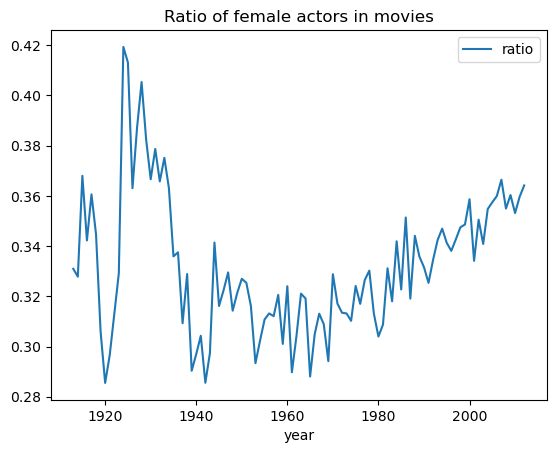

In [362]:
#merge the movie dates using wikipedia ids
movie_gender_date = pd.merge(movie_gender, movie_df[['wikipedia_movie_id', 'movie_release_date']], on='wikipedia_movie_id').dropna()
movie_gender_date['year'] = pd.DatetimeIndex(movie_gender_date['movie_release_date']).year.astype('int')

#group the movies by year and drop years with less than 200 movies
movie_gender_date = movie_gender_date[movie_gender_date.groupby('year')['year'].transform('size') > 200].\
    groupby('year')['ratio'].mean().reset_index()

#plot the graph
movie_gender_date.plot(x='year', y='ratio', kind='line', title='Ratio of female actors in movies');
